<a href="https://www.kaggle.com/code/ganeshvaishnav30/zomato-eda?scriptVersionId=136581944" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# *Bangalore Restaurants Exploratory Data Analysis*

### Purpose:

The project aims to provide valuable insights into the restaurants dataset, allowing you to understand the dynamics of the restaurant industry, customer ratings, and factors influencing customer satisfaction. It can help in making informed decisions, identifying potential opportunities, and optimizing various aspects of restaurant operations and marketing strategies.

### About DataSet: 

**Source :** "https://www.kaggle.com/datasets/himanshupoddar/zomato-bangalore-restaurants"

**Size** = 545 Mb

This dataset contains information about restaurants in Banglore avaiable on zomato and its ratings and features.

Columns: 
- url : This feature contains the url of the restaurant on the Zomato website
- address : This feature contains the address of the restaurant in Bangalore
- name : This feature contains the name of the restaurant
- online_order : whether online ordering is available in the restaurant or not
- book_table : table book option available or not
- rate : contains the overall rating of the restaurant out of 5
- votes : contains total number of upvotes for the restaurant
- phone : contains the phone number of the restaurant
- location : contains the neighborhood in which the restaurant is located
- rest_type : restaurant type
- dish_liked : dishes people liked in the restaurant
- cuisines : food styles, separated by comma
- approx_cost(for two people) : contains the approximate cost of meal for two people
- reviews_list : list of tuples containing reviews for the restaurant, each tuple consists of two values, rating and review by -the customer
- menu_item : contains list of menus available in the restaurant
- listed_in(type) : type of meal
- listed_in(city) : contains the neighborhood in which the restaurant is located

# Breakdown of NoteBook

This notebook will walk you through a thorough data analysis of the Kaggle dataset for Zomato Bengalore Restaurants.
It involves 
- Learning about Dataset ,exploring its information and features provided
- Data Cleaning and Preprocessing
- Visulaizations
- Answering the Questions

## Questions Answered:

- What percentage of restaurants offer online ordering  ✅
- Relation between Online Ordering and Rating of Restaurants ✅
- Relation between Table Booking and Rating of Restaurants ✅
- correlation between the average rating of a restaurant and the number of votes ✅
- distribution of restaurant ratings across different locations?✅
- Which locations have the highest number of restaurants listed? ✅
- What is the average cost for two people in different restaurant types? ✅

## *Import Libraries*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/zomato-bangalore-restaurants/zomato.csv


## *Load Dataset*

In [2]:
df = pd.read_csv('/kaggle/input/zomato-bangalore-restaurants/zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## *Reading and Learning  Data*

In [3]:
df.shape

(51717, 17)

In [4]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


It implies only "votes" column is **numerical**. Rest all are **Categorical**

In [5]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

###### Columns with Null Values are -> rate,phone,location,rest_type,dish_liked ,cuisines,approx_cost 

In [7]:
# Checking Null Value percentage in each Column

null_percent = df.isnull().sum()*100/len(df)
null_percent

url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

#### Cleaning DataSet
               Deleting redundant columns 
               Renaming the columns 
               Dropping duplicates
               Cleaning individual columns.
               Remove the NaN values from the dataset

## *Data Cleaning & preprocessing*

In [8]:
# Drop Duplicates value
df = df.drop_duplicates()
df.shape

(51717, 17)

No Change in DataSet . We will try again after dropping some unwanted columns

In [9]:
# Drop Unwanted Columns
df.drop(['url','address','phone','menu_item','reviews_list'],axis=1,inplace=True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


In [10]:
# Dropping 'Dish_liked ' Column
df = df.drop('dish_liked',axis=1)

In [11]:
df.shape

(51717, 11)

In [12]:
# Rename Some Columns
df = df.rename(columns = {'approx_cost(for two people)':'cost','listed_in(type)':'type','listed_in(city)':'city'})
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,type,city
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [13]:
# Drop Duplicates value
df = df.drop_duplicates()
df.shape

(51609, 11)

There were some duplicate value which are deleted now

In [14]:
# Missing Values 
null_percent = df.isnull().sum()*100/len(df)
null_percent

name             0.000000
online_order     0.000000
book_table       0.000000
rate            15.026449
votes            0.000000
location         0.040691
rest_type        0.439846
cuisines         0.087194
cost             0.666550
type             0.000000
city             0.000000
dtype: float64

###### Handling Missing Values for Rate

In [15]:
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [16]:
# we only want initial rating in float format e.g (4.1)
# Some other value includes 'NEW','-' and nan

In [17]:
# function to convert (4.1/5) string to 4.1 float and handling 'NEW' and '-'

def apply_convert(value):
    if value=='NEW' or value=='-':
        return np.nan
    val = str(value).split('/')
    return round(float(val[0]),1)
df['rate'] = df['rate'].apply(apply_convert)


In [18]:
def handle_rate(value):
    if(value=='NEW' or value=='-'):
        return np.nan
    else:
        value = str(value).split('/')
        value = value[0]
        return round(float(value),1)
    
df['rate'] = df['rate'].apply(handle_rate)
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [19]:
df.rate.unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51609 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51609 non-null  object 
 1   online_order  51609 non-null  object 
 2   book_table    51609 non-null  object 
 3   rate          41590 non-null  float64
 4   votes         51609 non-null  int64  
 5   location      51588 non-null  object 
 6   rest_type     51382 non-null  object 
 7   cuisines      51564 non-null  object 
 8   cost          51265 non-null  object 
 9   type          51609 non-null  object 
 10  city          51609 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


###### Handling Missing Values for Cost

In [21]:
df['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

Because of comma in between digits , they cannot be converted to float

In [22]:
# function to remove comma
def str2float(value):
    value = str(value)
    if len(value) <=3:
        return float(value)
    val = value.split(',')
    no = ''
    for num in val:
        no += num
    return float(no)

df['cost'] = df['cost'].apply(str2float)

In [23]:
df['cost'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700.,   nan, 1400.,  180., 1350.,
       2200., 2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800.,
       3400.,   40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,
        469.,   70., 3200.,   60.,  560.,  240.,  360., 6000., 1050.,
       2300., 4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [24]:
# Replace nan with mean cost
df['cost'] = df['cost'].fillna(value = round(float(df['cost'].mean())))
df['cost'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700.,  555., 1400.,  180., 1350.,
       2200., 2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800.,
       3400.,   40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,
        469.,   70., 3200.,   60.,  560.,  240.,  360., 6000., 1050.,
       2300., 4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [25]:
# function to round of to float with decimal 1
def roundof(value):
    return round(float(value))
df['cost'] = df['cost'].apply(roundof)
df['cost'].unique()

array([ 800,  300,  600,  700,  550,  500,  450,  650,  400,  900,  200,
        750,  150,  850,  100, 1200,  350,  250,  950, 1000, 1500, 1300,
        199,   80, 1100,  160, 1600,  230,  130,   50,  190, 1700,  555,
       1400,  180, 1350, 2200, 2000, 1800, 1900,  330, 2500, 2100, 3000,
       2800, 3400,   40, 1250, 3500, 4000, 2400, 2600,  120, 1450,  469,
         70, 3200,   60,  560,  240,  360, 6000, 1050, 2300, 4100, 5000,
       3700, 1650, 2700, 4500,  140])

In [26]:
df.isnull().sum()

name                0
online_order        0
book_table          0
rate            10019
votes               0
location           21
rest_type         227
cuisines           45
cost                0
type                0
city                0
dtype: int64

###### For Rest of columns - Location,rest_type, cuisines :
    We can't really do much about Null Values
    Hence, we Will SImply drop them

In [27]:
df = df.dropna()
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [28]:
df.isnull().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
cost            0
type            0
city            0
dtype: int64

In [29]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


##### Checking Outliers

In [30]:
df['type'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [31]:
df['type'].value_counts()

Delivery              20513
Dine-out              14126
Desserts               2726
Cafes                  1526
Drinks & nightlife     1048
Buffet                  853
Pubs and bars           638
Name: type, dtype: int64

###### Every Type includes specific amount of counts , So no need to apply any Changes

In [32]:
df['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ..., 'Tibetan, Nepalese',
       'North Indian, Street Food, Biryani',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [33]:
df['cuisines'].value_counts()

North Indian                                             2147
North Indian, Chinese                                    1952
South Indian                                             1233
Cafe                                                      642
Bakery, Desserts                                          615
                                                         ... 
North Indian, Mughlai, Chinese, Seafood, South Indian       1
Chinese, Thai, Seafood, Malaysian                           1
North Indian, Chinese, Arabian, Kebab                       1
Turkish, Fast Food, Biryani, Chinese                        1
North Indian, Chinese, Arabian, Momos                       1
Name: cuisines, Length: 2374, dtype: int64

There are many types of cuisines.

***We will generalize all cuisines with count< 100 as 'Others'***

In [34]:
cuisines_count = df['cuisines'].value_counts()
cuisines_less100 =  cuisines_count[cuisines_count<100]
cuisines_less100

Kerala, South Indian                                     94
Biryani, South Indian                                    89
North Indian, Mughlai, Chinese                           89
Cafe, Continental, Beverages                             87
Andhra, Biryani, North Indian, Chinese                   86
                                                         ..
North Indian, Mughlai, Chinese, Seafood, South Indian     1
Chinese, Thai, Seafood, Malaysian                         1
North Indian, Chinese, Arabian, Kebab                     1
Turkish, Fast Food, Biryani, Chinese                      1
North Indian, Chinese, Arabian, Momos                     1
Name: cuisines, Length: 2313, dtype: int64

In [35]:
# function to convert cuisines_less100 to Others
def convert_others(value):
    if value in cuisines_less100:
        return 'others'
    return value
df['cuisines']= df['cuisines'].apply(convert_others)
df['cuisines'].value_counts()

others                                23223
North Indian                           2147
North Indian, Chinese                  1952
South Indian                           1233
Cafe                                    642
                                      ...  
Chinese, Thai, Momos                    110
North Indian, Chinese, Continental      105
Andhra, Biryani                         104
Italian, Pizza                          101
Cafe, Bakery                            100
Name: cuisines, Length: 62, dtype: int64

###### we have Generalized all smaller types of cuisines into Others

###### Rest_type 
    Generalize to Others with less rest_type count 

In [36]:
df['rest_type'].value_counts()

Quick Bites                   13920
Casual Dining                  9637
Cafe                           3401
Dessert Parlor                 1861
Delivery                       1675
                              ...  
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Dessert Parlor, Kiosk             2
Bakery, Beverage Shop             1
Quick Bites, Kiosk                1
Name: rest_type, Length: 87, dtype: int64

In [37]:
# Less Than 1000

rest_type = df['rest_type'].value_counts()
rest_less1000 = rest_type[rest_type < 1000 ]

# function to convert cuisines_less100 to Others

def convert_others(value):
    if value in rest_less1000:
        return 'others'
    return value
df['rest_type']= df['rest_type'].apply(convert_others)
df['rest_type'].value_counts()

Quick Bites           13920
Casual Dining          9637
others                 8542
Cafe                   3401
Dessert Parlor         1861
Delivery               1675
Takeaway, Delivery     1289
Casual Dining, Bar     1105
Name: rest_type, dtype: int64

## *Visualization*

##### Votes Column

<Axes: xlabel='votes', ylabel='Count'>

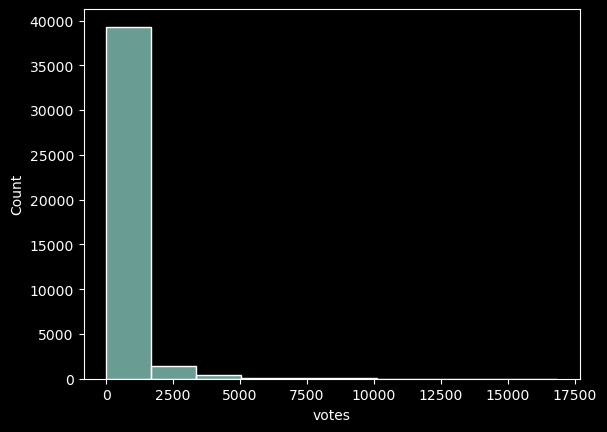

In [38]:
#sns.set(style='dark')
plt.style.use('dark_background')
sns.histplot(data=df, x='votes', bins=10)

<Axes: xlabel='votes', ylabel='Count'>

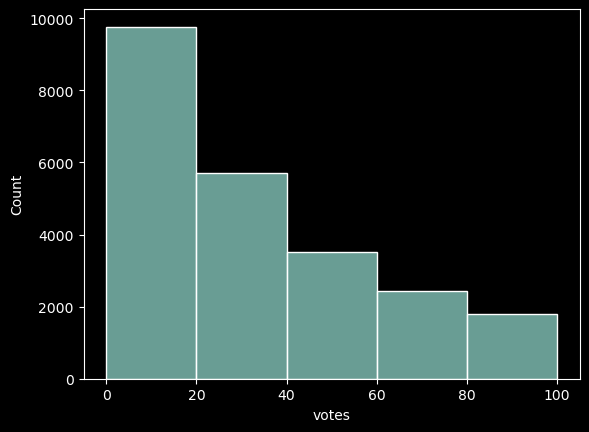

In [39]:
votes = df['votes'][df['votes']<=100]
sns.histplot( x=votes, bins=5)


*There is voting <100 for so many restaurants.*

##### Online order vs Rate

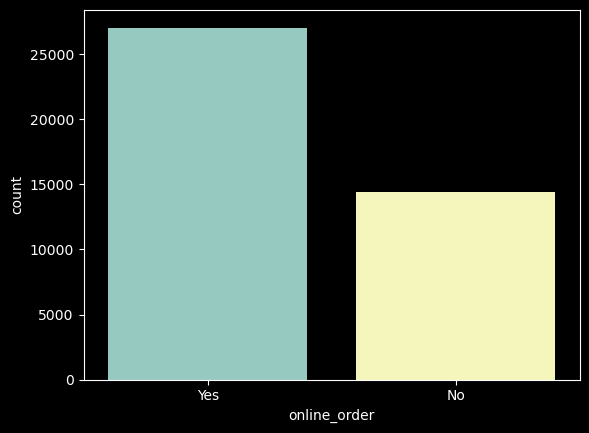

In [40]:

sns.countplot( x='online_order', data=df)
plt.show()

In [41]:
percent  = df['online_order'].value_counts()*100 /len(df)
percent

Yes    65.281197
No     34.718803
Name: online_order, dtype: float64

***Almost  59% of Restaurants has online order facility***

<Axes: xlabel='online_order', ylabel='rate'>

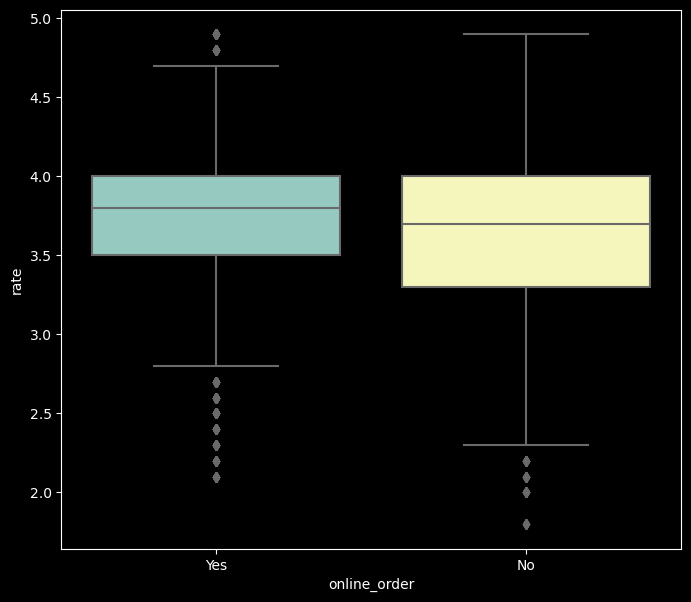

In [42]:
plt.figure(figsize=(8,7))
sns.boxplot(x='online_order',y='rate',data=df)

###### Restaurants with online order available  has relatively higher concentrated ratings

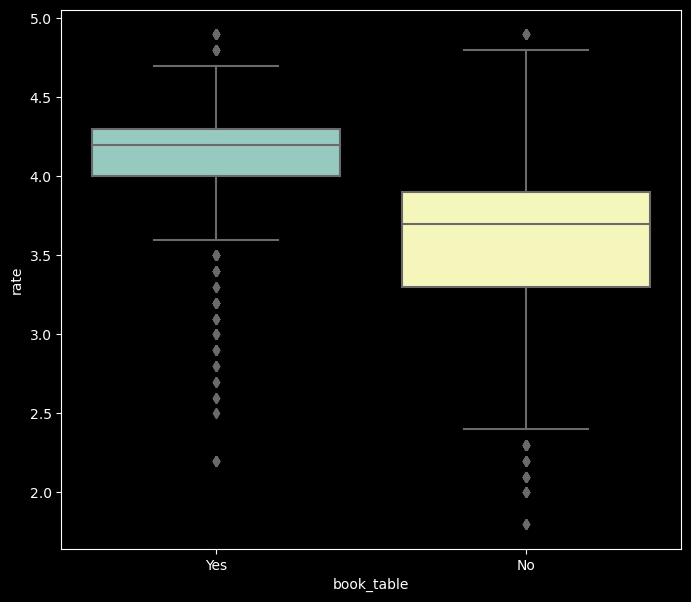

In [43]:
plt.figure(figsize = (8,7))
sns.boxplot(x='book_table',y='rate',data=df  )
plt.show()

Restaurants with table Booking available has relatively **higher concentrated ratings**

In [44]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,others,800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600,Buffet,Banashankari


##### Top 10  Locations with most Restaurants

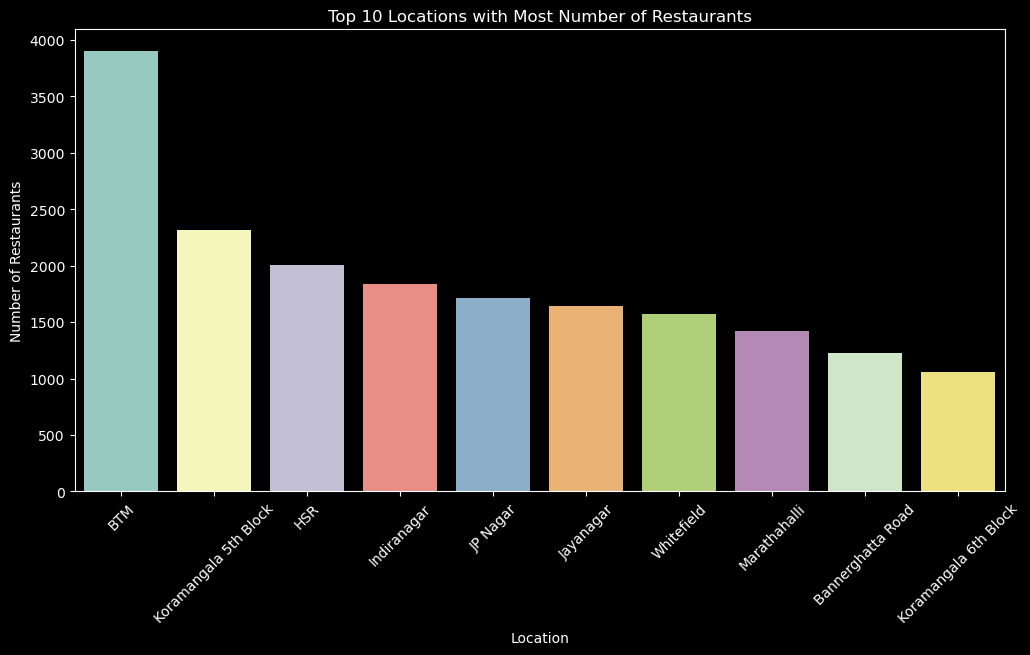

In [45]:

top_10_locations = df['location'].value_counts()[:10]

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='location', order=top_10_locations.index)
plt.title('Top 10 Locations with Most Number of Restaurants')
plt.xlabel('Location')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

**BTM** has **most number** of restaurants in Bangalore

##### Votes vs Rate

###### Question :  correlation between the average rating of a restaurant and the number of votes

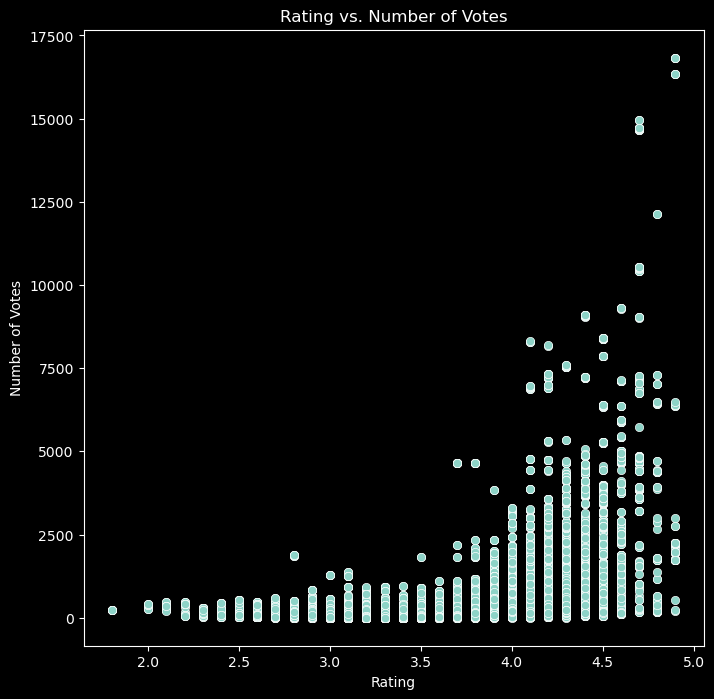

In [46]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df, x='rate', y='votes')
plt.title('Rating vs. Number of Votes')
plt.xlabel('Rating')
plt.ylabel('Number of Votes')
plt.show()

<Axes: xlabel='rate', ylabel='votes'>

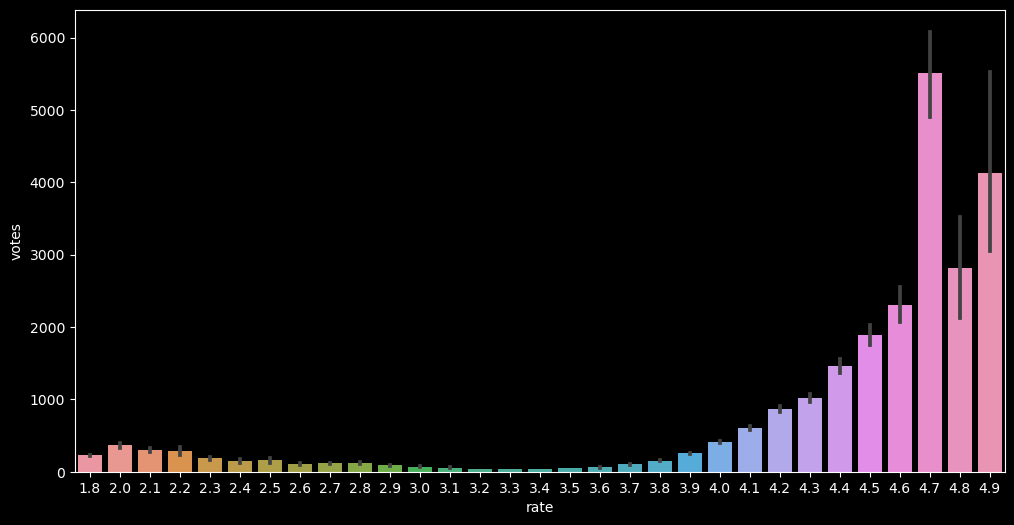

In [47]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='rate', y='votes')

*Thus It clearly shows  **more the number of votes** indicates more people are coming to these Restaurants, which eventually means there **ratings will also be More**.*

##### Location vs Rate

###### distribution of restaurant ratings across different locations?

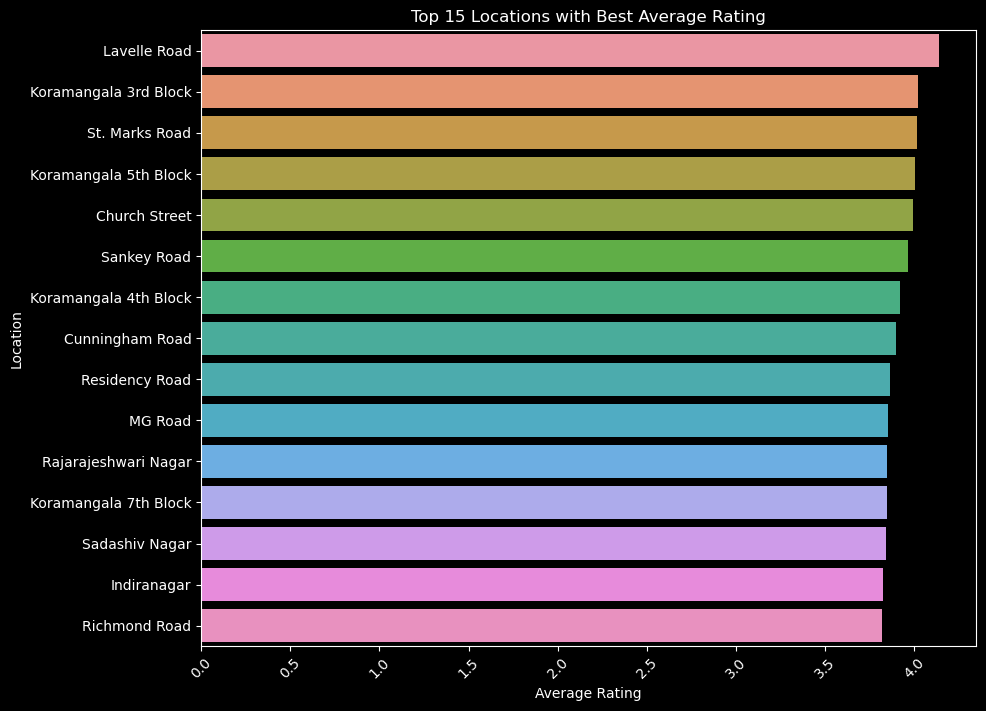

In [48]:
average_ratings = df.groupby('location')['rate'].mean().reset_index()
top_10_loc = average_ratings.nlargest( 15,'rate')

plt.figure(figsize=(10,8))
sns.barplot(data=top_10_loc, x='rate', y='location')
plt.title('Top 15 Locations with Best Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Location')
plt.xticks(rotation=45)
plt.show()

*Here are **Top 15 Locations** in Bangalore with **highest average rating** around 4. Which means one can get **best Food and Services** here*

### Location vs Votes

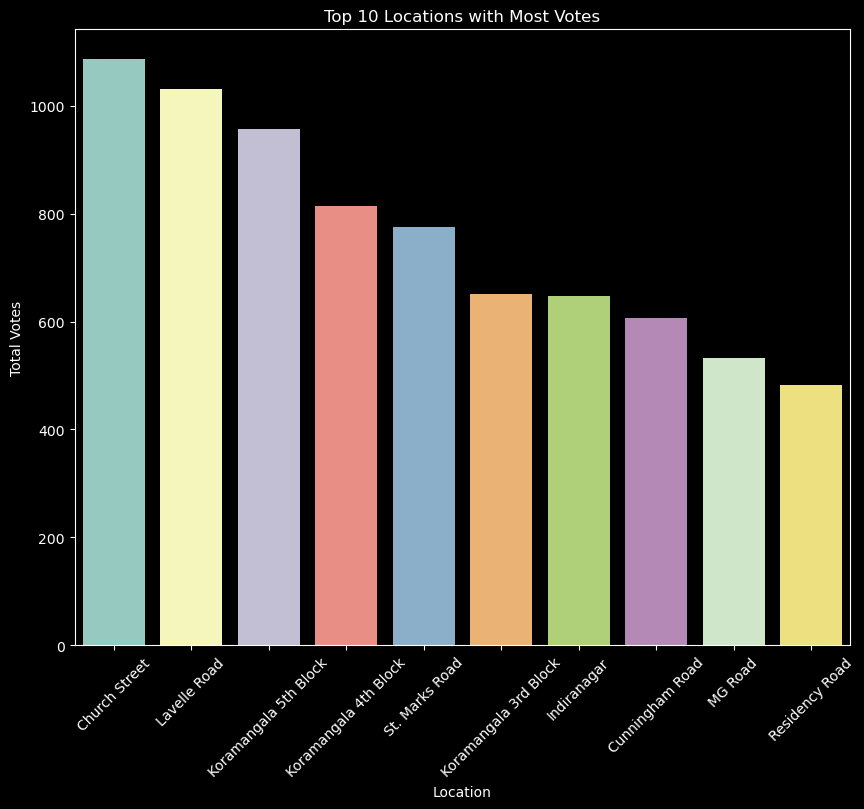

In [49]:
tot_votes = df.groupby('location')['votes'].mean().reset_index()
top_10_loc = tot_votes.nlargest( 10,'votes')

plt.figure(figsize=(10,8))
sns.barplot(data=top_10_loc, x='location', y='votes')
plt.title('Top 10 Locations with Most Votes')
plt.xlabel('Location')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)
plt.show()

**Insight** -> It can be observed Though **Church Street** has most number of votes depicting **most customers**.
It is still **not on Top 10 most restaurants list**. 
Thus , It is Best to open a restaurant on Church Street as It has **more customers and relatively less competition**.

##### Cost vs Restaurant Types

###### What is the average cost for two people in different restaurant types?

In [50]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,others,800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600,Buffet,Banashankari


In [51]:
avg_cost = df.groupby('rest_type')['cost'].agg('mean').reset_index()
avg_cost

,rest_type,cost
0,Cafe,630.808586
1,Casual Dining,797.519975
2,"Casual Dining, Bar",1249.221719
3,Delivery,454.176119
4,Dessert Parlor,344.715207
5,Quick Bites,329.971624
6,"Takeaway, Delivery",412.095423
7,others,849.347928


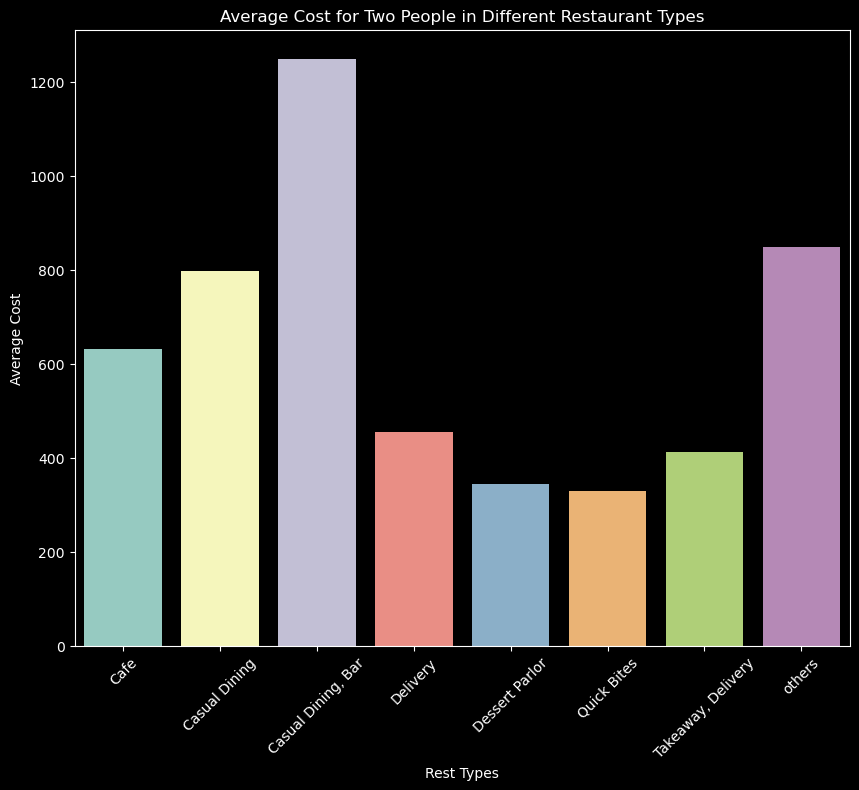

In [52]:
plt.figure(figsize=(10,8))
sns.barplot(data =avg_cost, x= 'rest_type' , y = 'cost' )
plt.title('Average Cost for Two People in Different Restaurant Types')
plt.xlabel('Rest Types')
plt.ylabel('Average Cost')
plt.xticks(rotation=45)
plt.show()

*Resto Types like **Bars , Casual DIning and Cafe** are most  costly with Bars averaging above **1200 R** for two people*